In [1]:
# Import the package and data
import pandas as pd
import numpy as np 

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn 
from matplotlib import pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Accuracy
from sklearn.metrics import accuracy_score
## Precision
from sklearn.metrics import precision_score
## Recall
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn import tree

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('../0-data/Root_Insurance_data.csv')



# data clean 

In [3]:
# Data clean
## Currently Insured: categorical/unknow, N, Y
## Number of Vehicles: ordinal
## Number of Drivers: ordinal
## Marital Status: categorical/ M, S
## rank: ordinal

## There are two ways to run regressions when having categorial variables in datasets.
## 1. Delete those categorical variables.
## 2. Keep them but generate dummy variables. 
## since we don't have much features in our dataset, i would go for dummies.

## Create dummies for Currently Insured and Marital Status. 
## 1. For Currently Insured, i left "unknow" as baseline case. So Insured_N, and Insured_Y are created and included. 
## 2. For Marital Status, i left "S" as baseline case. So Married are created and included. 
## For the other variables I would treat them as ordinal.

pd.get_dummies(df['Currently Insured'])
df['Insured_Un'] = pd.get_dummies(df['Currently Insured'])['unknown']
df['Insured_N'] = pd.get_dummies(df['Currently Insured'])['N']
df['Insured_Y'] = pd.get_dummies(df['Currently Insured'])['Y']

pd.get_dummies(df['Marital Status'])
df['Married'] = pd.get_dummies(df['Marital Status'])['M']

df['no.veh1'] = pd.get_dummies(df['Number of Vehicles'])[1]
df['no.veh2'] = pd.get_dummies(df['Number of Vehicles'])[2]
df['no.veh3'] = pd.get_dummies(df['Number of Vehicles'])[3]

df['no.dri1'] = pd.get_dummies(df['Number of Drivers'])[1]
df['no.dri2'] = pd.get_dummies(df['Number of Drivers'])[2]


pd.get_dummies(df['click'])
df['click_true'] = pd.get_dummies(df['click'])[True]



df.head()

,Currently Insured,Number of Vehicles,Number of Drivers,Marital Status,bid,rank,click,policies_sold,Insured_Un,Insured_N,Insured_Y,Married,no.veh1,no.veh2,no.veh3,no.dri1,no.dri2,click_true
0,unknown,2,1,M,10.0,2,False,0,1,0,0,1,0,1,0,1,0,0
1,Y,3,1,M,10.0,5,False,0,0,0,1,1,0,0,1,1,0,0
2,Y,3,2,M,10.0,5,False,0,0,0,1,1,0,0,1,0,1,0
3,N,3,2,S,10.0,4,False,0,0,1,0,0,0,0,1,0,1,0
4,unknown,2,2,S,10.0,2,False,0,1,0,0,0,0,1,0,0,1,0


# Here we use click as the outcome variable, test whether or not including variable rank would be different

# 1. with rank 

define X and y 

In [5]:
X = df[['Insured_Un','Insured_N','Insured_Y', 'Married', 'no.veh1', 'no.veh2', 'no.veh3','no.dri1', 'no.dri2','rank']].copy()
X = sm.add_constant(X) 

y = df['click'].copy()

split data into test and train 

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size = .25,
                                                 random_state = 614,
                                                 shuffle = True,
                                                 stratify = y)


evaluate the performance and select the best depth parameter for the clissification tree

C:\Users\Xiaoliu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Xiaoliu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Xiaoliu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


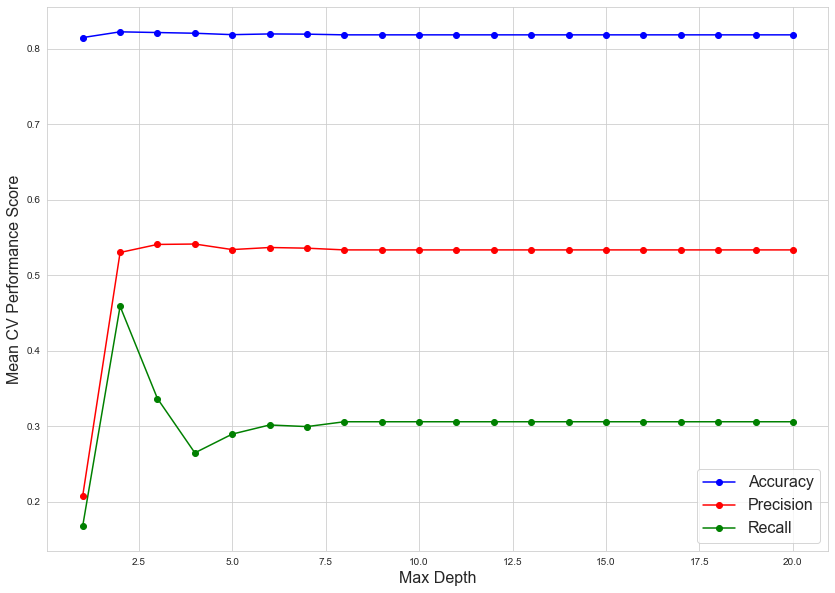

In [8]:
## Code here
## Use These functions will make calculating performance easier
## Accuracy
from sklearn.metrics import accuracy_score
## Precision
from sklearn.metrics import precision_score
## Recall
from sklearn.metrics import recall_score

## Import packages
## tree will be used to plot the decisiton tree
from sklearn import tree

## This is the actual out of the box algorithm
from sklearn.tree import DecisionTreeClassifier

## Perform cross-validation in the following blocks

## Import stratified k fold and clone here

## Sample Answer
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone


## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns


keep_cols = ["Insured_Un","Insured_N","Insured_Y","Married","no.veh1","no.veh2","no.veh3","no.dri1","no.dri2","rank"]

kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state=440)

X_train_copy = X_train[keep_cols].copy()

n = 20

accs = np.zeros((5,n))
precs = np.zeros((5,n))
recs = np.zeros((5,n))

for j in range(1,n+1):
    tree = DecisionTreeClassifier(max_depth=j, random_state = 440)
    
    i = 0
    for train_index,test_index in kfold.split(X_train_copy,y_train):
        X_train_train, X_train_test = X_train_copy.iloc[train_index],X_train_copy.iloc[test_index]
        y_train_train, y_train_test = y_train.iloc[train_index],y_train.iloc[test_index]

        tree_clone = clone(tree)
        tree_clone.fit(X_train_train,y_train_train)
        
        y_predict = tree_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs[i,j-1] = precision_score(y_train_test,y_predict)
        recs[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

        
## Plot the average CV acc, prec, and recall here


plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), np.mean(precs,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), np.mean(recs,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.show()

as shown in the figure, the optimal max depth is 2

generate the tree using max_depth=2 

0.6678492820459071


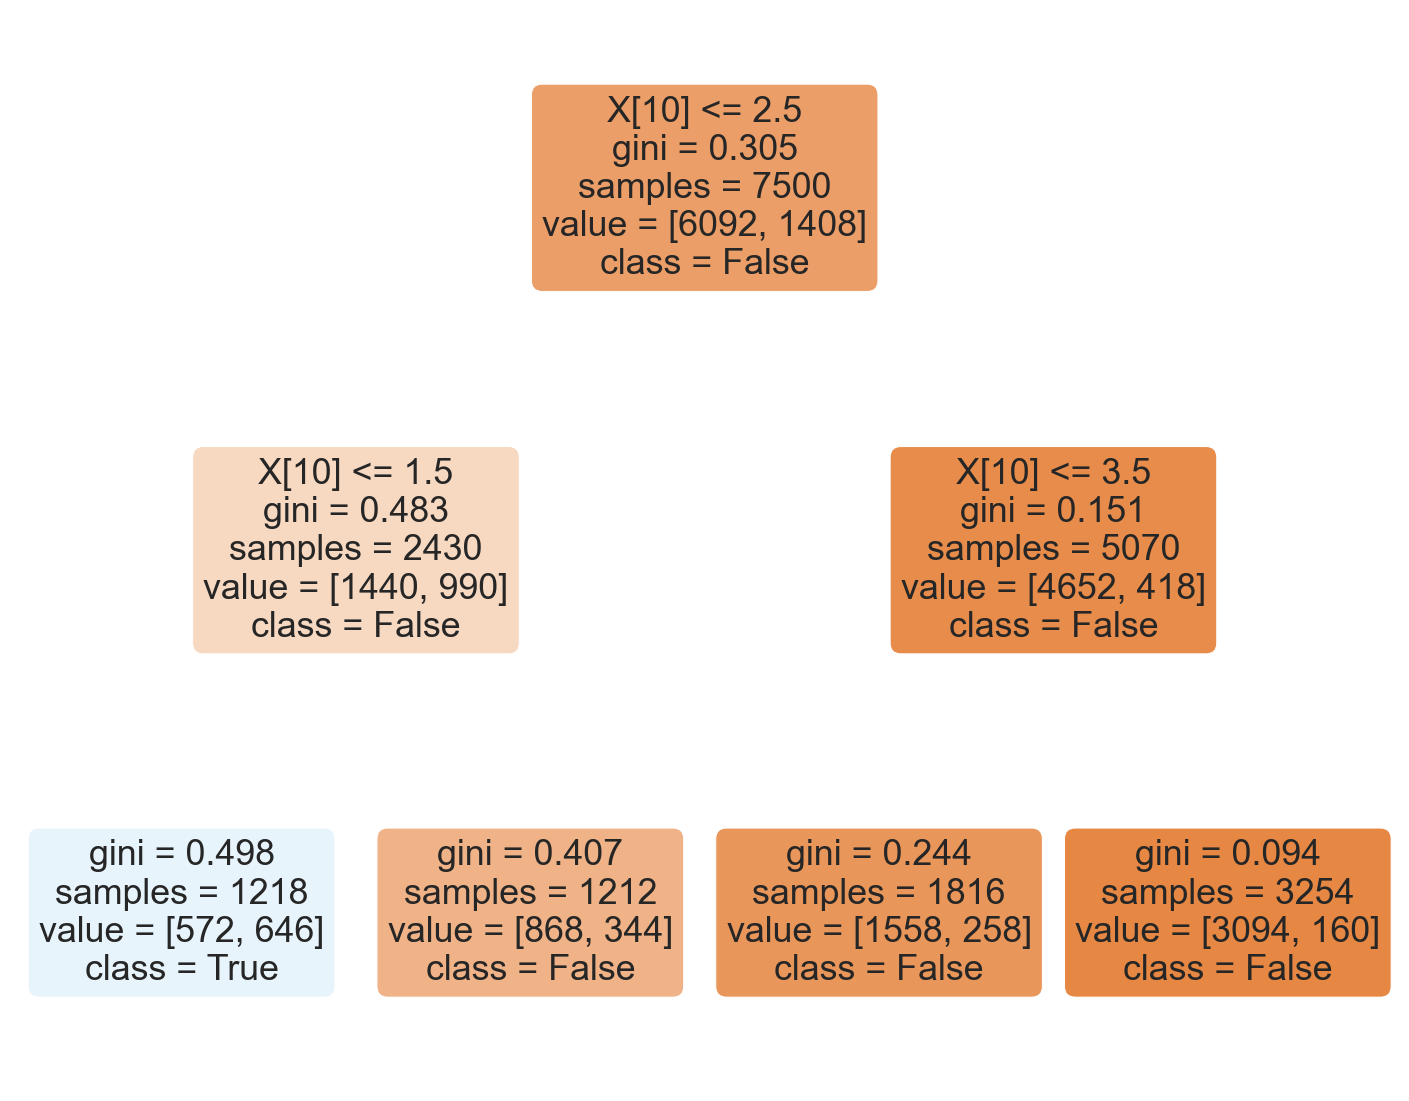

In [9]:
### generate the tree 
from sklearn.tree import plot_tree # tree diagram

clf = DecisionTreeClassifier(random_state = 440,max_depth = 2)

clf.fit(X_train,y_train)

fig = plt.figure(figsize=(25,20))
_= plot_tree(clf, filled = True,
                  class_names = ['False','True'],
          rounded = True)

plt.savefig('tree_visualization1.png') 

y_pred = clf.predict(X_test)

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

print(roc_auc)

Results:
  1. The model is significant and AUC=0.67
  2. the only variable that is significant is rank. 


Then we repeat the whole process and test the model without rank, however, the AUC is 0.5, meaning the model is not significant. Therefore we choose to not present the process. 

In the following chunk, we run the tree within each rank without rank variable.  

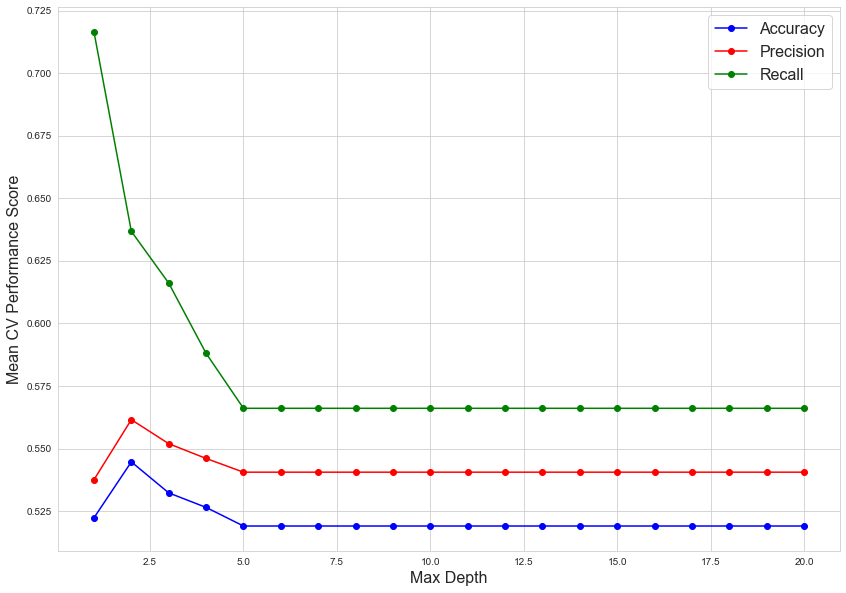

0.5400819915044948

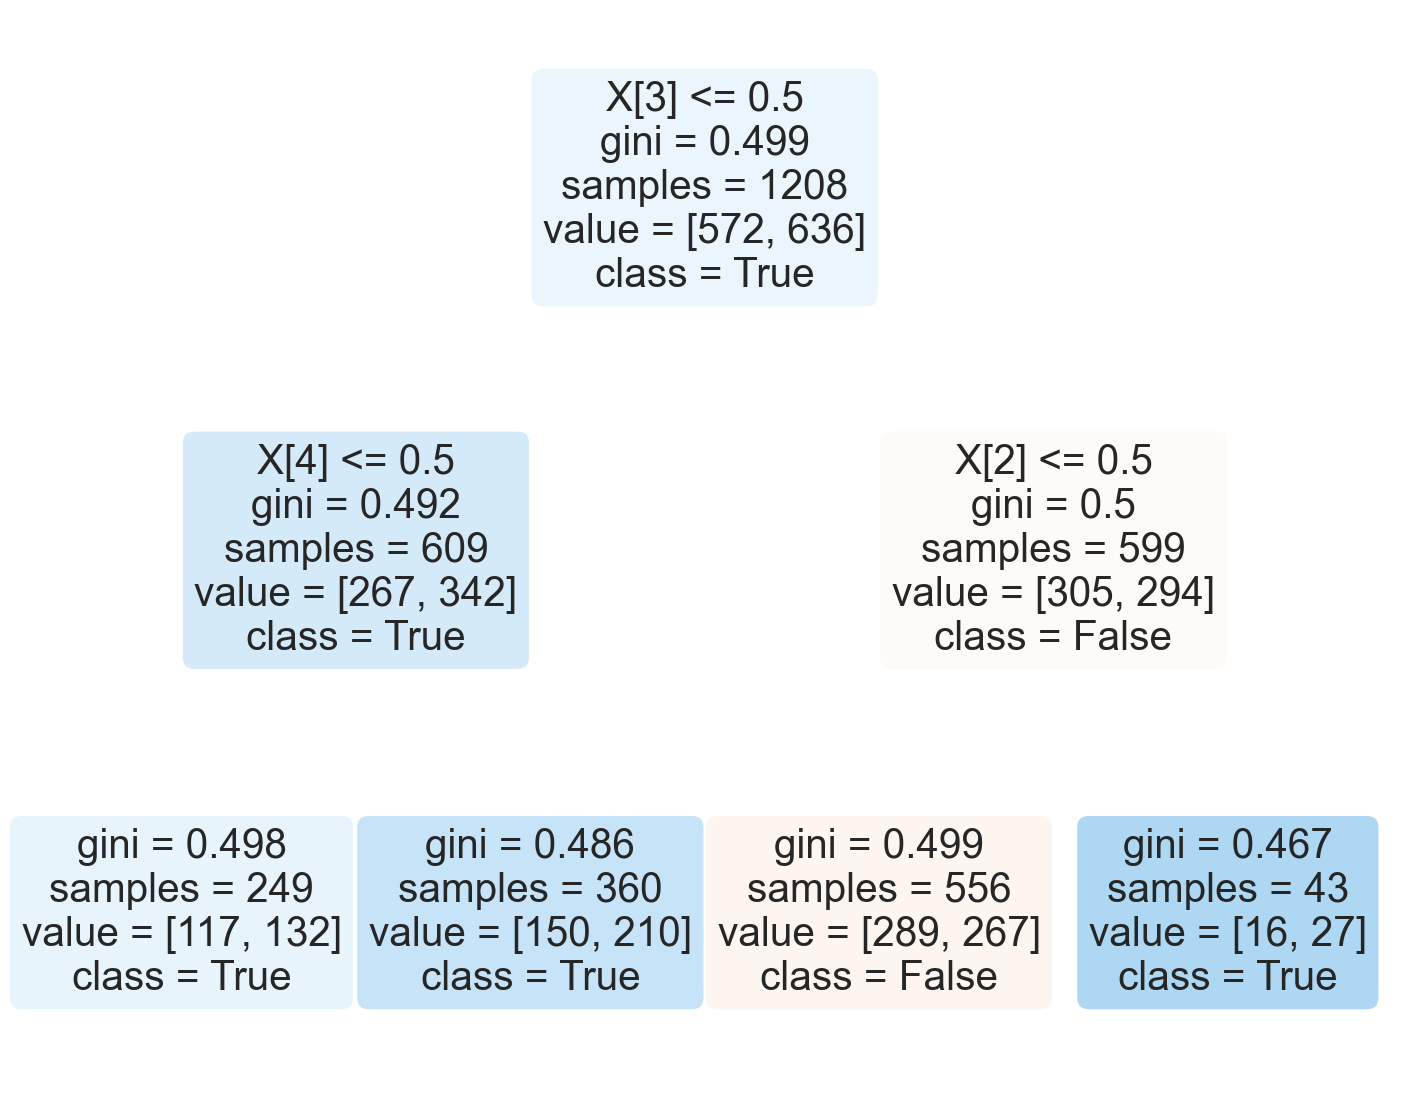

In [6]:
df1 = df[(df['rank'] == 1)]

X = df1[['Insured_Un','Insured_N','Insured_Y', 'Married', 'no.veh1', 'no.veh2', 'no.veh3','no.dri1', 'no.dri2']].copy()

y = df1['click'].copy()

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size = .25,
                                                 random_state = 614,
                                                 shuffle = True,
                                                 stratify = y)

## Code here
## Use These functions will make calculating performance easier
## Accuracy
from sklearn.metrics import accuracy_score
## Precision
from sklearn.metrics import precision_score
## Recall
from sklearn.metrics import recall_score

## Import packages
## tree will be used to plot the decisiton tree
from sklearn import tree

## This is the actual out of the box algorithm
from sklearn.tree import DecisionTreeClassifier

## Perform cross-validation in the following blocks

## Import stratified k fold and clone here

## Sample Answer
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone


## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns


keep_cols = ["Insured_Un","Insured_N","Insured_Y","Married","no.veh1","no.veh2","no.veh3","no.dri1","no.dri2"]

kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state=440)

X_train_copy = X_train[keep_cols].copy()

n = 20

accs = np.zeros((5,n))
precs = np.zeros((5,n))
recs = np.zeros((5,n))

for j in range(1,n+1):
    tree = DecisionTreeClassifier(max_depth=j, random_state = 440)
    
    i = 0
    for train_index,test_index in kfold.split(X_train_copy,y_train):
        X_train_train, X_train_test = X_train_copy.iloc[train_index],X_train_copy.iloc[test_index]
        y_train_train, y_train_test = y_train.iloc[train_index],y_train.iloc[test_index]

        tree_clone = clone(tree)
        tree_clone.fit(X_train_train,y_train_train)
        
        y_predict = tree_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs[i,j-1] = precision_score(y_train_test,y_predict)
        recs[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

        
## Plot the average CV acc, prec, and recall here


plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), np.mean(precs,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), np.mean(recs,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.show()


### generate the tree 
from sklearn.tree import plot_tree # tree diagram

clf = DecisionTreeClassifier(random_state = 440,max_depth = 2)

clf.fit(X_train,y_train)

fig = plt.figure(figsize=(25,20))
_= plot_tree(clf, filled = True,
                  class_names = ['False','True'],
          rounded = True)

plt.savefig('tree_visualization1.png') 

y_pred = clf.predict(X_test)

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

roc_auc

Results:
1. Only the rank1 model is significant.
2. By comparing the model on the whole sample and on the rank 1, we find the AUC drops from 0.67 to 0.54. 
3. The significant variables determining the tree structure are Insured_Y, Married, Insured_N. Insured_Y and Insured_N are dummies representing whether or not being insured, and Married is the dummy for marital status 

Could just ignore the following chunks, I use these code to test other parameters for the tree structure. It is not done by CV, but train and test data.  

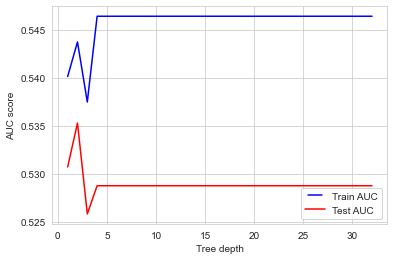

In [8]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   clf = tree.DecisionTreeClassifier(max_depth=max_depth)
   clf.fit(X_train, y_train)
   train_pred = clf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = clf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

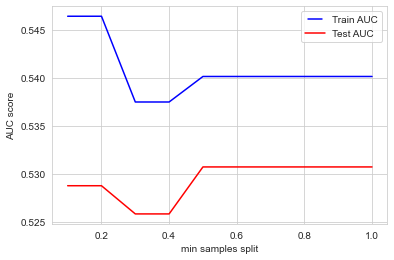

In [9]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   clf = tree.DecisionTreeClassifier(min_samples_split=min_samples_split)
   clf.fit(X_train, y_train)
   train_pred = clf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds =roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = clf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results,'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results,'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()



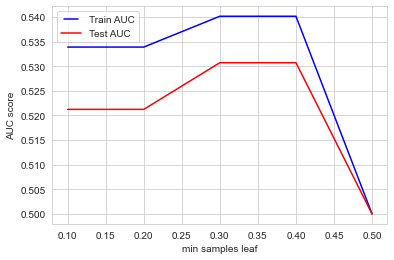

In [10]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   clf = tree.DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   clf.fit(X_train, y_train)
   train_pred = clf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = clf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results,'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results,'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

